In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
#from sm.tsa.statespace import sa
cocacola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

<AxesSubplot:xlabel='Sales'>

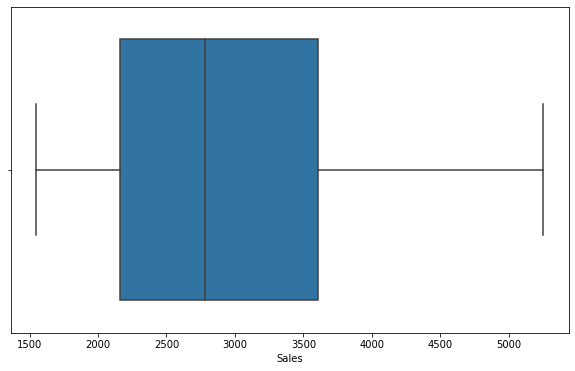

In [40]:
# Boxplot
sns.boxplot("Sales",data=cocacola)

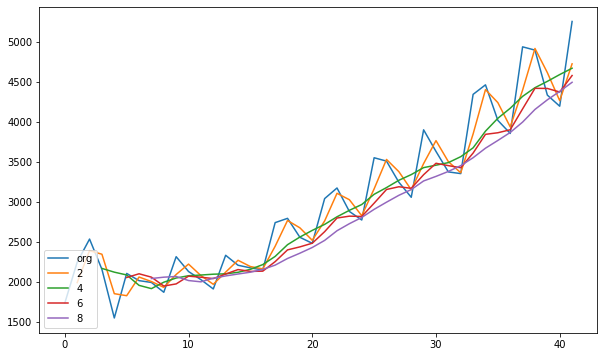

In [41]:
# moving average for the time series to understand better about the trend character in Amtrak
cocacola.Sales.plot(label="org")
for i in range(2,10,2):
    cocacola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

In [42]:
# Time series decomposition plot 
decompose_ts_add = seasonal_decompose(cocacola.Sales,model="additive")
decompose_ts_add.plot()
decompose_ts_mul = seasonal_decompose(cocacola.Sales,model="multiplicative")
decompose_ts_mul.plot()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

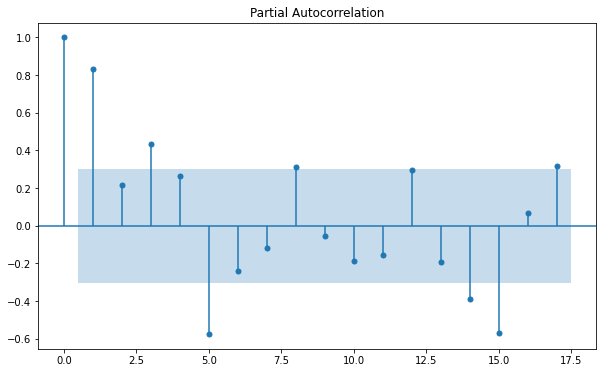

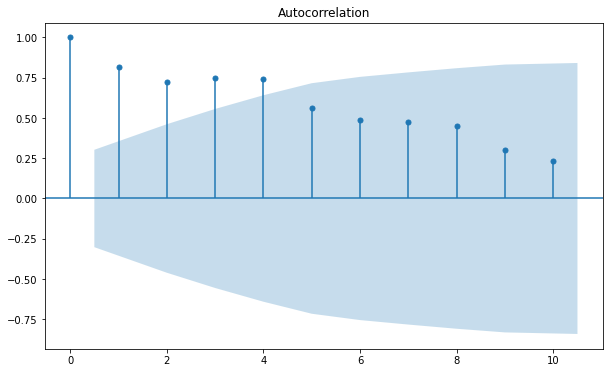

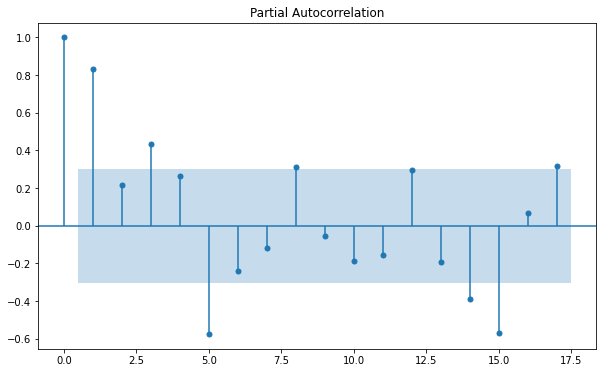

In [43]:
# ACF plots and PACF plots on Original data sets 
tsa_plots.plot_acf(cocacola.Sales,lags=10)
tsa_plots.plot_pacf(cocacola.Sales)

In [44]:
Train = cocacola.head(48)
Test =cocacola.tail(12)
# to change the index value in pandas data frame 
# Test.set_index(np.arange(1,13),inplace=True)

In [45]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

In [47]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

9.765071349339516

In [48]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

9.78507954478971